# *SOURCE*
https://www.youtube.com/watch?v=doDUihpj6ro&t=7339s
https://github.com/nicknochnack/ActionDetectionforSignLanguage

## **Install Dependency**

In [1]:
! pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 KB 40.8 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing 

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [4]:
! git clone https://github.com/nickbp760/Tutorial_LSTM_MP.git

Cloning into 'Tutorial_LSTM_MP'...
remote: Enumerating objects: 74984, done.
remote: Counting objects: 100% (26452/26452), done.
remote: Compressing objects: 100% (24703/24703), done.
remote: Total 74984 (delta 1753), reused 26448 (delta 1749), pack-reused 48532
Receiving objects: 100% (74984/74984), 1.04 GiB | 18.02 MiB/s, done.
Resolving deltas: 100% (16873/16873), done.
Updating files: 100% (79656/79656), done.


In [5]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    

## **Create Labels and Features**

The label map containts the action label

In [6]:
# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])
label_map = {label:num for num, label in enumerate(actions)}

In [7]:
label_map

{'LirikKanan': 0,
 'LirikKiri': 1,
 'MenolehKanan': 2,
 'MenolehKiri': 3,
 'Normal': 4,
 'TutupMata': 5}

## **DEFINE X (Input) and y (Output)**

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Real_TrainMediapipe') 

# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 50

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X_train = np.array(sequences)
print(X_train.shape)
y_train = to_categorical(labels).astype(int)
print(y_train.shape)

(180, 50, 1434)
(180, 6)


In [9]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Real_ValidMediapipe') 

# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])

# Thirty videos worth of data
no_sequences = 3

# Videos are going to be 30 frames in length
sequence_length = 50

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X_Valid = np.array(sequences)
print(X_Valid.shape)
y_Valid = to_categorical(labels).astype(int)
print(y_Valid.shape)

(18, 50, 1434)
(18, 6)


In [10]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Real_TestMediapipe') 

# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 50

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X_test = np.array(sequences)
print(X_test.shape)
y_test = to_categorical(labels).astype(int)
print(y_test.shape)

(180, 50, 1434)
(180, 6)


## **Build, Train and Test Neural Network**

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(50,1434)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [44]:
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_Valid, y_Valid))

Epoch 1/250
6/6 [==============================] - 7s 261ms/step - loss: 1.7997 - categorical_accuracy: 0.1556 - val_loss: 1.7903 - val_categorical_accuracy: 0.1667
Epoch 2/250
6/6 [==============================] - 0s 29ms/step - loss: 1.7824 - categorical_accuracy: 0.2167 - val_loss: 1.7822 - val_categorical_accuracy: 0.2778
Epoch 3/250
6/6 [==============================] - 0s 26ms/step - loss: 1.7774 - categorical_accuracy: 0.3222 - val_loss: 1.7888 - val_categorical_accuracy: 0.2222
Epoch 4/250
6/6 [==============================] - 0s 24ms/step - loss: 1.7660 - categorical_accuracy: 0.2667 - val_loss: 1.7719 - val_categorical_accuracy: 0.2778
Epoch 5/250
6/6 [==============================] - 0s 24ms/step - loss: 1.7464 - categorical_accuracy: 0.3167 - val_loss: 1.7861 - val_categorical_accuracy: 0.1667
Epoch 6/250
6/6 [==============================] - 0s 21ms/step - loss: 1.7246 - categorical_accuracy: 0.4111 - val_loss: 1.7835 - val_categorical_accuracy: 0.1667
Epoch 7/250
6/6

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 50, 128)           800256    
                                                                 
 dropout_10 (Dropout)        (None, 50, 128)           0         
                                                                 
 lstm_16 (LSTM)              (None, 50, 64)            49408     
                                                                 
 dropout_11 (Dropout)        (None, 50, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 128)               98816     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)               

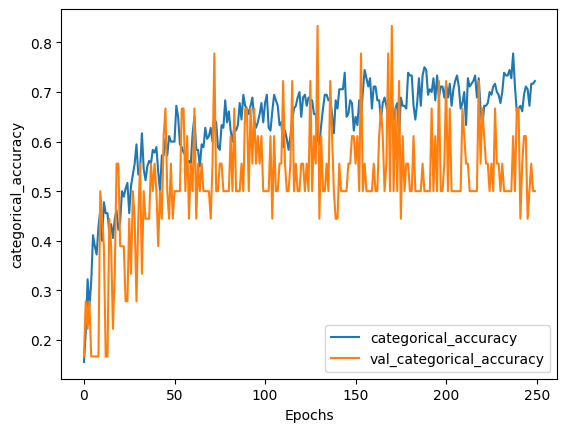

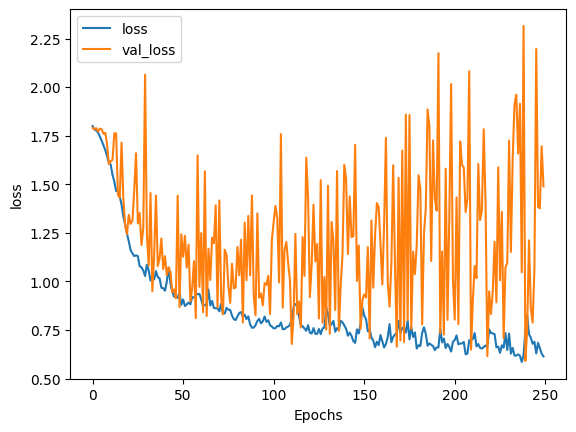

In [45]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionGRUNikoCheatDataReal_ReportLSTMMediaPipe.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

In [46]:
y_test_predict = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_test_predict, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.6611111111111111

## **Build, Train and Test Neural Network 2**

In [17]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [18]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, activation='tanh', input_shape=(50,1434)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [20]:
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_Valid, y_Valid))

Epoch 1/250
6/6 [==============================] - 6s 251ms/step - loss: 1.8034 - categorical_accuracy: 0.1722 - val_loss: 1.7897 - val_categorical_accuracy: 0.1667
Epoch 2/250
6/6 [==============================] - 0s 32ms/step - loss: 1.7823 - categorical_accuracy: 0.1722 - val_loss: 1.7779 - val_categorical_accuracy: 0.2222
Epoch 3/250
6/6 [==============================] - 0s 30ms/step - loss: 1.7664 - categorical_accuracy: 0.1833 - val_loss: 1.7622 - val_categorical_accuracy: 0.3333
Epoch 4/250
6/6 [==============================] - 0s 26ms/step - loss: 1.7412 - categorical_accuracy: 0.3056 - val_loss: 1.7272 - val_categorical_accuracy: 0.1667
Epoch 5/250
6/6 [==============================] - 0s 28ms/step - loss: 1.7022 - categorical_accuracy: 0.3278 - val_loss: 1.7213 - val_categorical_accuracy: 0.3333
Epoch 6/250
6/6 [==============================] - 0s 27ms/step - loss: 1.6534 - categorical_accuracy: 0.4056 - val_loss: 1.7115 - val_categorical_accuracy: 0.2778
Epoch 7/250
6/6

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 256)           1731584   
                                                                 
 dropout_2 (Dropout)         (None, 50, 256)           0         
                                                                 
 lstm_4 (LSTM)               (None, 50, 128)           197120    
                                                                 
 dropout_3 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)               

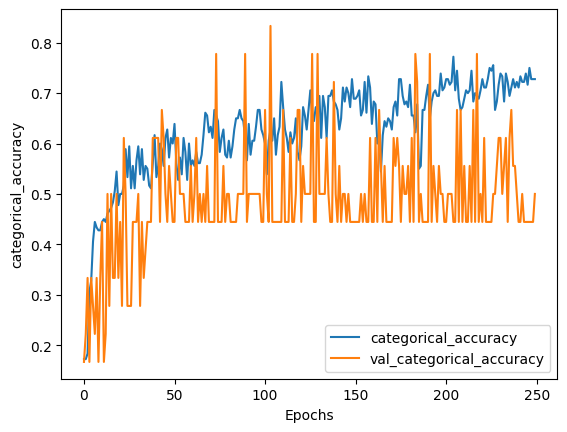

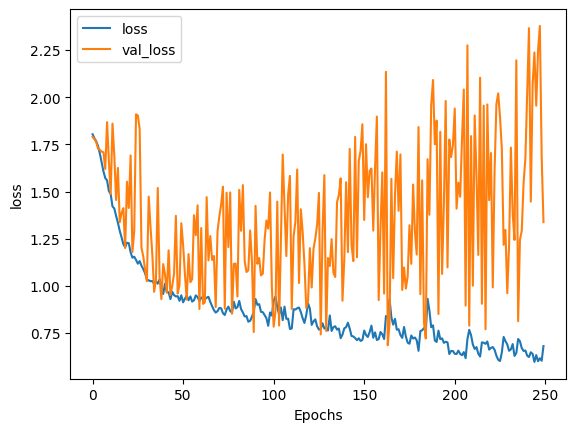

In [21]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionGRUNikoCheatDataReal_ReportLSTM2MediaPipe.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

In [22]:
y_test_predict = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_test_predict, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.6444444444444445

## **Build, Train and Test Neural Network 3**

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(50,1434)))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [38]:
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_Valid, y_Valid))

Epoch 1/250
6/6 [==============================] - 7s 289ms/step - loss: 1.7999 - categorical_accuracy: 0.1722 - val_loss: 1.7870 - val_categorical_accuracy: 0.1667
Epoch 2/250
6/6 [==============================] - 0s 34ms/step - loss: 1.7757 - categorical_accuracy: 0.2111 - val_loss: 1.7796 - val_categorical_accuracy: 0.1667
Epoch 3/250
6/6 [==============================] - 0s 27ms/step - loss: 1.7754 - categorical_accuracy: 0.2500 - val_loss: 1.7814 - val_categorical_accuracy: 0.1667
Epoch 4/250
6/6 [==============================] - 0s 24ms/step - loss: 1.7483 - categorical_accuracy: 0.1833 - val_loss: 1.7772 - val_categorical_accuracy: 0.1667
Epoch 5/250
6/6 [==============================] - 0s 24ms/step - loss: 1.7067 - categorical_accuracy: 0.2500 - val_loss: 1.7418 - val_categorical_accuracy: 0.1667
Epoch 6/250
6/6 [==============================] - 0s 24ms/step - loss: 1.6713 - categorical_accuracy: 0.3611 - val_loss: 1.7282 - val_categorical_accuracy: 0.2778
Epoch 7/250
6/6

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50, 128)           800256    
                                                                 
 dropout_8 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_13 (LSTM)              (None, 50, 256)           394240    
                                                                 
 dropout_9 (Dropout)         (None, 50, 256)           0         
                                                                 
 lstm_14 (LSTM)              (None, 128)               197120    
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)               

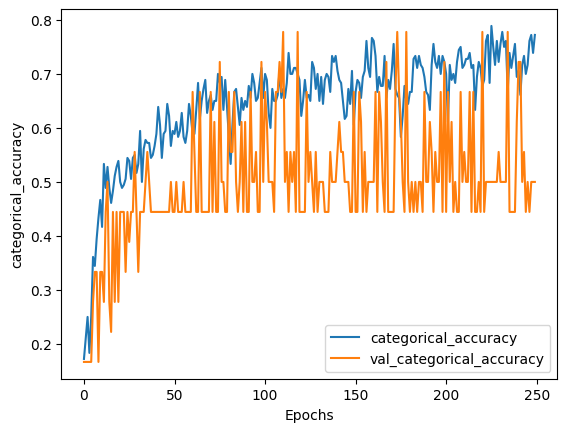

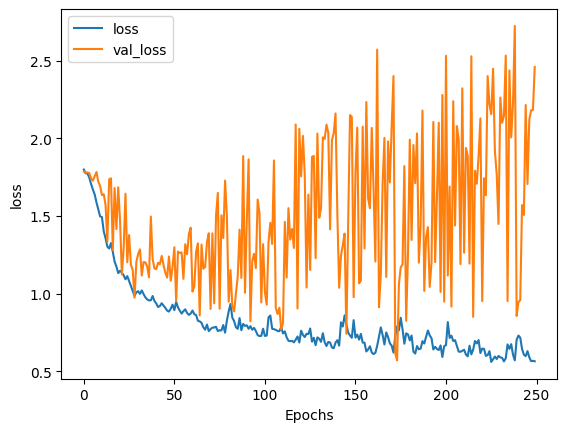

In [39]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionGRUNikoCheatDataReal_ReportLSTM3MediaPipe.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

In [40]:
y_test_predict = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_test_predict, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.6777777777777778